In [32]:
import pandas as pd

# Load the CSV
df = pd.read_csv("AI_appl_results_combined.csv")

# The column with categories should be something like 'AI Applications' or similar.
# If it's a stringified list, convert it to a list.
def extract_categories(cell):
    if pd.isna(cell):
        return []
    # Remove brackets and quotes, then split by comma
    return [cat.strip().strip("'").strip('"') for cat in str(cell).strip("[]").split(",") if cat.strip()]

# Apply extraction to the relevant column
category_col = 'AI Applications'  # Change if your column name is different
all_categories = df[category_col].apply(extract_categories)

# Flatten and count
from collections import Counter
category_counts = Counter(cat for cats in all_categories for cat in cats)

# Print results
for category, count in category_counts.items():
    print(f"{category}: {count}")


# Count documents classified into at least one category
classified_mask = all_categories.apply(lambda cats: len(cats) > 0)
num_classified = classified_mask.sum()
num_not_classified = (~classified_mask).sum()
total_docs = len(df)
percent_classified = (num_classified / total_docs) * 100

print(f"Number of documents classified into at least one category: {num_classified}")
print(f"Number of documents NOT classified into any category: {num_not_classified}")
print(f"Percentage classified: {percent_classified:.1f}%")

Public Health AI: 175
Operational and Administrative Automation: 169
Research and Clinical Trial AI: 198
Clinical Documentation AI: 176
Medical Imaging AI: 170
Education and Training AI: 188
Patient-facing AI: 195
Clinical Decision Support: 156
Predictive Analytics: 92
Robotics and Surgical AI: 107
Number of documents classified into at least one category: 422
Number of documents NOT classified into any category: 780
Percentage classified: 35.1%


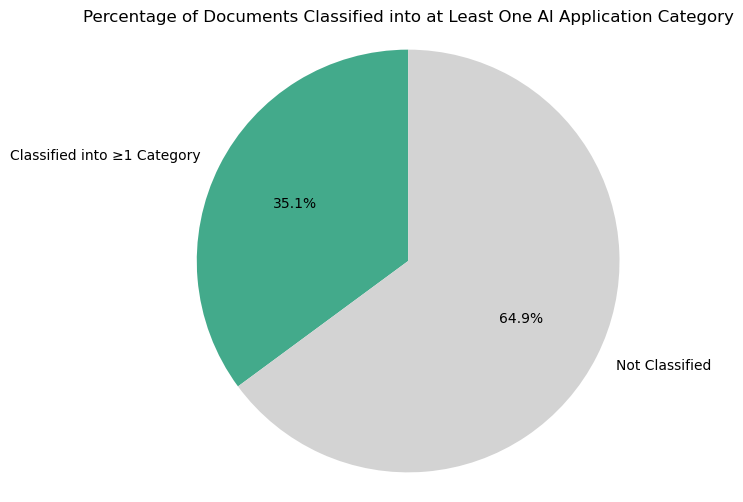

In [51]:
import matplotlib.pyplot as plt

labels = ['Classified into ≥1 Category', 'Not Classified']
sizes = [num_classified, num_not_classified]
colors = ['#43aa8b', '#d3d3d3']  # pleasant green and light grey

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Documents Classified into at Least One AI Application Category')
plt.axis('equal')
plt.show()

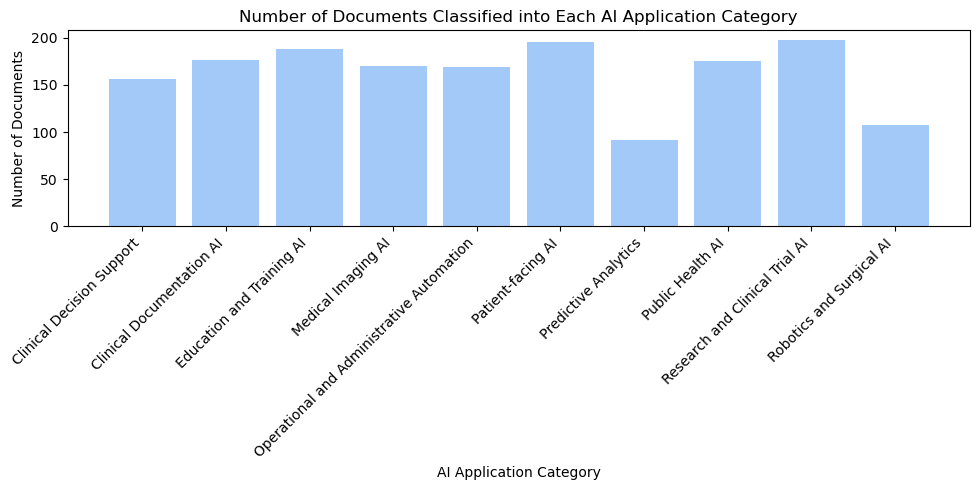

In [33]:
# bar graph of # of documents classified into each category
import matplotlib.pyplot as plt

# Sort categories alphabetically
sorted_items = sorted(category_counts.items(), key=lambda x: x[0])
categories = [item[0] for item in sorted_items]
counts = [item[1] for item in sorted_items]

plt.figure(figsize=(10, 5))
plt.bar(categories, counts, color='#a3c9f9')
plt.xlabel('AI Application Category')
plt.ylabel('Number of Documents')
plt.title('Number of Documents Classified into Each AI Application Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

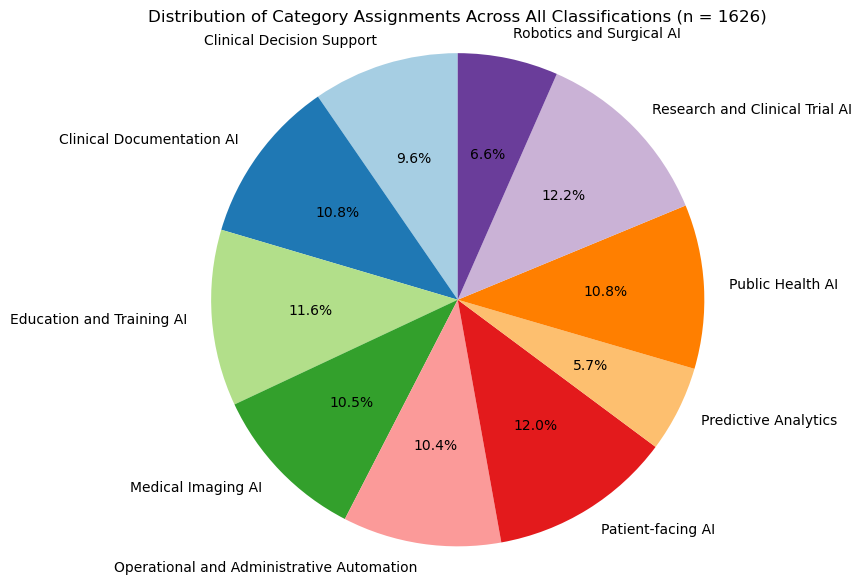

In [34]:
import matplotlib.pyplot as plt

# Pie chart of the percentage of category assignments for each category
# there are a total of 1,626 category assignments (the sum of all counts), and the percentages represent the fraction of the total taggings
# This shows how often each category was tagged, out of all category assignments made

labels = categories  # already sorted alphabetically in previous cell
sizes = counts
colors = plt.cm.Paired.colors[:len(categories)]  # use a colormap for distinct colors

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Category Assignments Across All Classifications (n = 1626)')
plt.axis('equal')
plt.show()

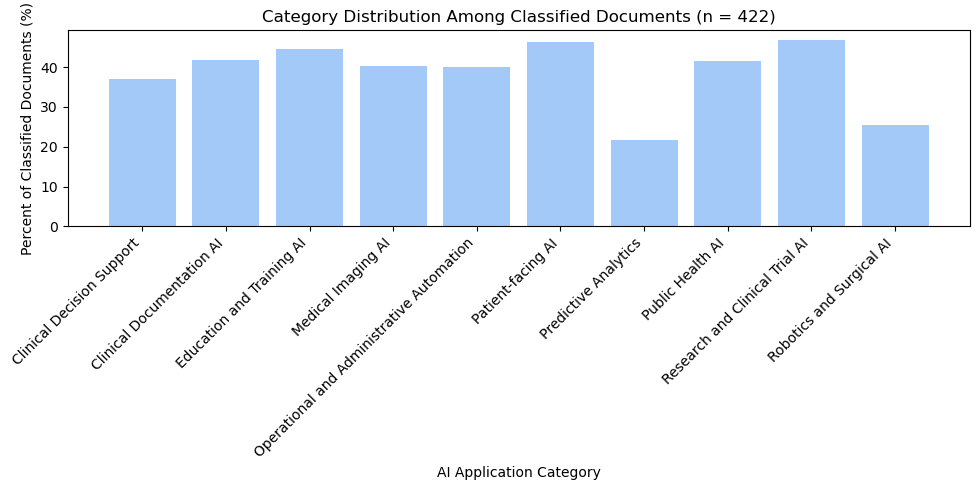

In [35]:
# Bar graph of the Category Distribution Among Classified Documents
# This answers: "Among documents that were categorized, how common is each category?"
# Sum will exceed 100% because documents can be classified into multiple categories.
# Basically showing the same thing as # of documents bar graph

import matplotlib.pyplot as plt

# Only consider classified documents (at least one category)
classified_docs = all_categories[classified_mask]

# Flatten and count categories among classified docs only
from collections import Counter
classified_category_counts = Counter(cat for cats in classified_docs for cat in cats)

# Sort alphabetically
sorted_items = sorted(classified_category_counts.items(), key=lambda x: x[0])
categories = [item[0] for item in sorted_items]
counts = [item[1] for item in sorted_items]

# Calculate percentage for each category out of total classified docs
percentages = [count / num_classified * 100 for count in counts]

plt.figure(figsize=(10, 5))
plt.bar(categories, percentages, color='#a3c9f9')
plt.xlabel('AI Application Category')
plt.ylabel('Percent of Classified Documents (%)')
plt.title('Category Distribution Among Classified Documents (n = 422)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
# Helper to extract (category, score) pairs from each row
import re

def extract_category_score_pairs(cat_cell, score_cell):
    # Extract categories
    cats = extract_categories(cat_cell)
    # Extract scores: find all numbers (including decimals and negatives)
    if pd.isna(score_cell):
        scores = []
    else:
        # This regex finds numbers (including negative and decimal)
        scores = [float(s) for s in re.findall(r'-?\d+\.\d+|-?\d+', str(score_cell))]
    # Pair up to the shortest length to keep associations
    return list(zip(cats, scores))

# Example: create a list of (category, score) pairs for each row
category_score_pairs = [extract_category_score_pairs(cat, score)
                        for cat, score in zip(df['AI Applications'], df['Similarity Scores'])]

# Flatten and group by category
from collections import defaultdict
category_scores = defaultdict(list)
for pairs in category_score_pairs:
    for cat, score in pairs:
        category_scores[cat].append(score)

# Print average similarity score for each category
for cat in sorted(category_scores.keys()):
    avg_score = sum(category_scores[cat]) / len(category_scores[cat]) if category_scores[cat] else float('nan')
    print(f"{cat}: {avg_score:.3f}")

Clinical Decision Support: 0.639
Clinical Documentation AI: 0.629
Education and Training AI: 0.623
Medical Imaging AI: 0.635
Operational and Administrative Automation: 0.633
Patient-facing AI: 0.629
Predictive Analytics: 0.624
Public Health AI: 0.627
Research and Clinical Trial AI: 0.625
Robotics and Surgical AI: 0.625


In [38]:
# Find the highest and lowest similarity score and their associated category

max_score = float('-inf')
min_score = float('inf')
max_cat = None
min_cat = None

for cat, scores in category_scores.items():
    for score in scores:
        if score > max_score:
            max_score = score
            max_cat = cat
        if score < min_score:
            min_score = score
            min_cat = cat

print(f"Highest similarity score: {max_score:.3f} (Category: {max_cat})")
print(f"Lowest similarity score: {min_score:.3f} (Category: {min_cat})")

Highest similarity score: 0.760 (Category: Clinical Decision Support)
Lowest similarity score: 0.600 (Category: Public Health AI)


In [39]:
# Extract the highest and lowest similarity scores for each category

for cat in sorted(category_scores.keys()):
    scores = category_scores[cat]
    if scores:
        max_score = max(scores)
        min_score = min(scores)
        print(f"{cat}: Highest = {max_score:.3f}, Lowest = {min_score:.3f}")
    else:
        print(f"{cat}: No scores available")

Clinical Decision Support: Highest = 0.760, Lowest = 0.600
Clinical Documentation AI: Highest = 0.690, Lowest = 0.600
Education and Training AI: Highest = 0.692, Lowest = 0.600
Medical Imaging AI: Highest = 0.737, Lowest = 0.600
Operational and Administrative Automation: Highest = 0.693, Lowest = 0.600
Patient-facing AI: Highest = 0.700, Lowest = 0.601
Predictive Analytics: Highest = 0.684, Lowest = 0.601
Public Health AI: Highest = 0.697, Lowest = 0.600
Research and Clinical Trial AI: Highest = 0.695, Lowest = 0.600
Robotics and Surgical AI: Highest = 0.723, Lowest = 0.601


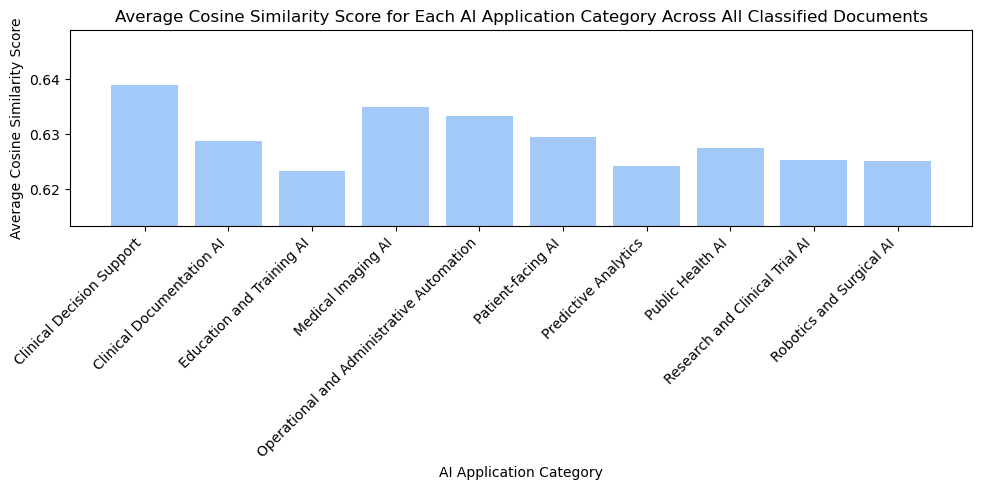

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average similarity score for each category
avg_scores = []
categories_sorted = sorted(category_scores.keys())
for cat in categories_sorted:
    scores = category_scores[cat]
    avg = sum(scores) / len(scores) if scores else 0
    avg_scores.append(avg)

plt.figure(figsize=(10, 5))
bars = plt.bar(categories_sorted, avg_scores, color='#a3c9f9')
plt.xlabel('AI Application Category')
plt.ylabel('Average Cosine Similarity Score')
plt.title('Average Cosine Similarity Score for Each AI Application Category Across All Classified Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Set y-axis limits to zoom in on the range of scores
min_score = min(avg_scores)
max_score = max(avg_scores)
plt.ylim(min_score - 0.01, max_score + 0.01)  # adjust padding as needed

plt.show()

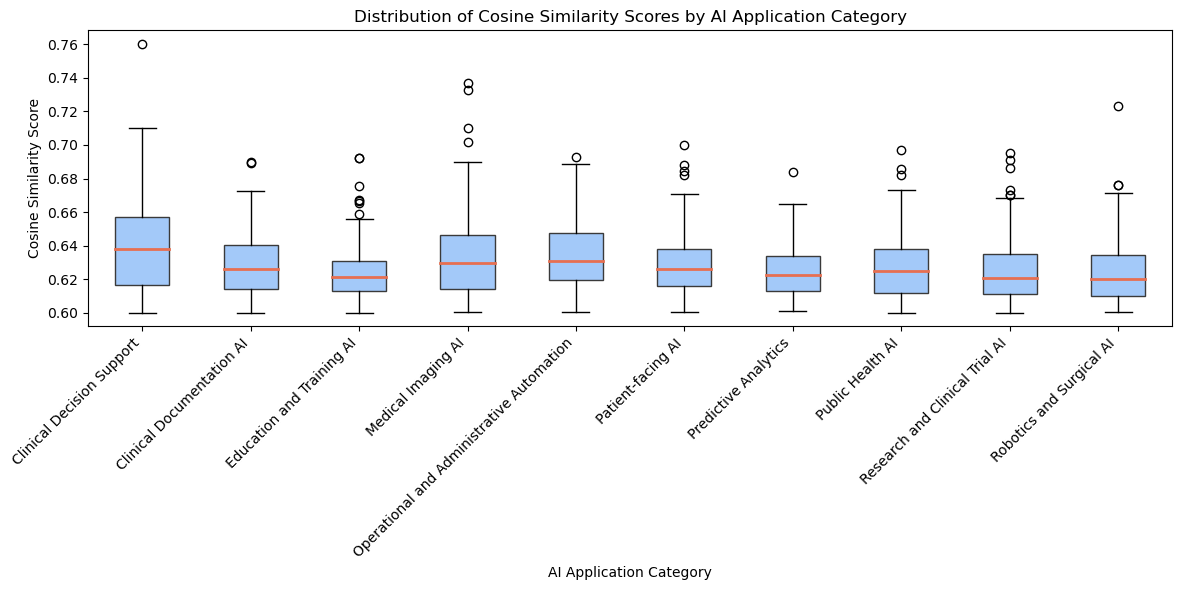

In [41]:
import matplotlib.pyplot as plt

# Ensure category_scores is a dict of category -> list of scores
# If not already extracted, use the following extraction:
# (You can skip this if category_scores is already defined as in previous cells)
# from collections import defaultdict
# category_scores = defaultdict(list)
# for pairs in category_score_pairs:
#     for cat, score in pairs:
#         category_scores[cat].append(score)

# Prepare data for boxplot
categories_sorted = sorted(category_scores.keys())
data = [category_scores[cat] for cat in categories_sorted]

plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=categories_sorted, patch_artist=True,
            boxprops=dict(facecolor='#a3c9f9', color='#3a3a3a'),
            medianprops=dict(color='#e76f51', linewidth=2))
plt.xlabel('AI Application Category')
plt.ylabel('Cosine Similarity Score')
plt.title('Distribution of Cosine Similarity Scores by AI Application Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

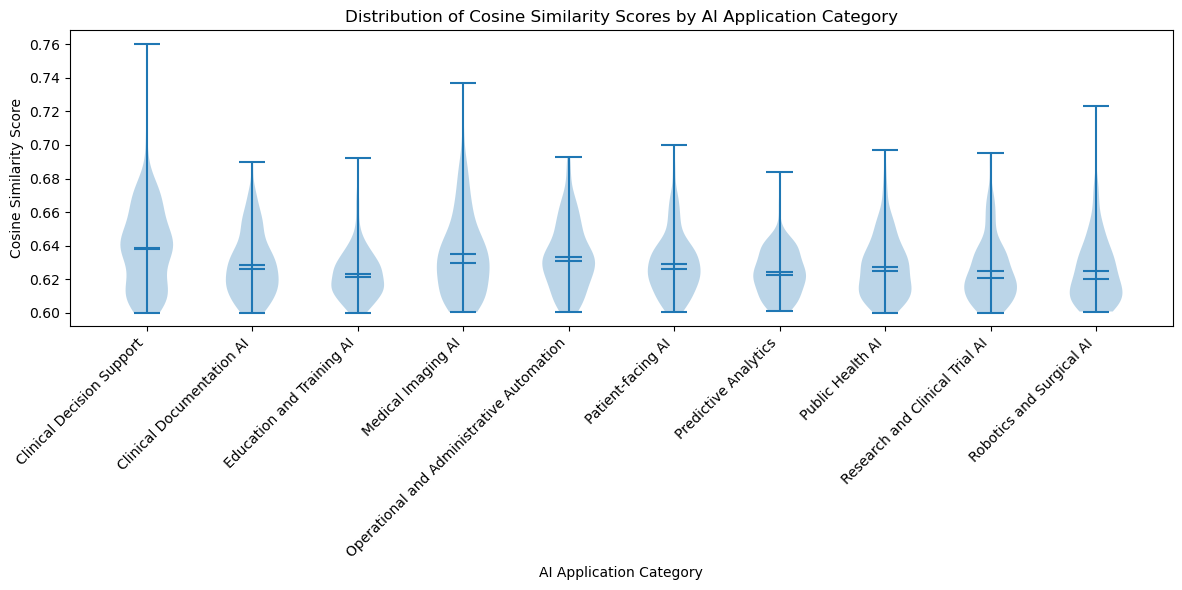

In [42]:
import matplotlib.pyplot as plt

# Prepare data for violin plot
categories_sorted = sorted(category_scores.keys())
data = [category_scores[cat] for cat in categories_sorted]

plt.figure(figsize=(12, 6))
parts = plt.violinplot(data, showmeans=True, showmedians=True)

# Set x-tick labels
plt.xticks(ticks=range(1, len(categories_sorted) + 1), labels=categories_sorted, rotation=45, ha='right')
plt.xlabel('AI Application Category')
plt.ylabel('Cosine Similarity Score')
plt.title('Distribution of Cosine Similarity Scores by AI Application Category')
plt.tight_layout()
plt.show()